In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

In [2]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [3]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [4]:
from keras import backend as k

In [5]:
with open('mnist_raw_data.npy', 'rb') as f:
    raw_data = np.load(f, allow_pickle=True, encoding = 'latin1')
raw_data.shape

(55000, 28, 28, 1)

In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
with open('mnist_label_data.npy', 'rb') as f:
    label_data = np.load(f, allow_pickle=True, encoding = 'latin1')
label_data.shape

(55000, 10)

In [ ]:
model.fit(raw_data ,label_data, steps_per_epoch = 10, epochs = 42)

Epoch 1/42
10/10 [==============================] - 4s 443ms/step - loss: 2.2296 - accuracy: 0.4067
Epoch 2/42
10/10 [==============================] - 5s 476ms/step - loss: 1.8092 - accuracy: 0.6850
Epoch 3/42
10/10 [==============================] - 5s 475ms/step - loss: 0.9982 - accuracy: 0.7815
Epoch 4/42
10/10 [==============================] - 5s 504ms/step - loss: 0.5209 - accuracy: 0.8483
Epoch 5/42
10/10 [==============================] - 5s 523ms/step - loss: 0.3535 - accuracy: 0.8929
Epoch 6/42
10/10 [==============================] - 5s 535ms/step - loss: 0.2719 - accuracy: 0.9194
Epoch 7/42
10/10 [==============================] - 5s 526ms/step - loss: 0.2264 - accuracy: 0.9329
Epoch 8/42
10/10 [==============================] - 5s 525ms/step - loss: 0.1957 - accuracy: 0.9416
Epoch 9/42
10/10 [==============================] - 5s 541ms/step - loss: 0.1742 - accuracy: 0.9478
Epoch 10/42
10/10 [==============================] - 5s 537ms/step - loss: 0.1608 - accuracy: 0.9513

In [67]:
from keras.models import Model
import tensorflow as tf

row_idx = tf.range(tf.shape(y)[0])
col_idx = tf.argmax(y, axis=1, output_type=tf.dtypes.int32)
full_indices = tf.stack([row_idx, col_idx], axis=1)
fx_tensors = tf.gather_nd(y, full_indices)

x_tensors = model.trainable_weights

num_samples = 100
m = Model(inputs=model.input, outputs=fx_tensors)

fisher_information = []
for v in range(len(x_tensors)):
    fisher_information.append(np.zeros(x_tensors[v].get_shape().as_list()).astype(np.float32))

for i in range(num_samples):
    data_idx = np.random.randint(raw_data.shape[0])
    sampled_data = raw_data[data_idx:data_idx+1]
    sampled_input_variables = [ sampled_data ]
    print ('sample num: %4d, data_idx: %5d' % (i, data_idx))

    with tf.GradientTape() as tape:
        p = m(sampled_data)
        lo = tf.math.log(p)

    gradients = tape.gradient(lo, x_tensors)
    derivatives = [g.numpy() for g in gradients]
    prob = p.numpy()[0]
    
#     derivatives, prob = sess.run([tf.gradients(tf.log(fx_tensors), x_tensors), fx_tensors],
#     feed_dict={t: v for t,v in zip(input_tensors, sampled_input_variables)})

    for v in range(len(fisher_information)):
        fisher_information[v] += np.square(derivatives[v]) * prob

for v in range(len(fisher_information)):
    fisher_information[v] /= num_samples

sample num:    0, data_idx: 16672
sample num:    1, data_idx: 20374
sample num:    2, data_idx: 37484
sample num:    3, data_idx: 37840
sample num:    4, data_idx: 28963
sample num:    5, data_idx: 52219
sample num:    6, data_idx: 31463
sample num:    7, data_idx: 52237
sample num:    8, data_idx: 43029
sample num:    9, data_idx: 41118
sample num:   10, data_idx: 47181
sample num:   11, data_idx:  4486
sample num:   12, data_idx: 22110
sample num:   13, data_idx: 11609
sample num:   14, data_idx: 19336
sample num:   15, data_idx: 18993
sample num:   16, data_idx:  7952
sample num:   17, data_idx: 45953
sample num:   18, data_idx: 27458
sample num:   19, data_idx: 37805
sample num:   20, data_idx: 29758
sample num:   21, data_idx: 30809
sample num:   22, data_idx:  9999
sample num:   23, data_idx:  9485
sample num:   24, data_idx: 31084
sample num:   25, data_idx: 49378
sample num:   26, data_idx: 20180
sample num:   27, data_idx: 20549
sample num:   28, data_idx:  5758
sample num:   

In [68]:
[f.shape for f in fisher_information]

[(3, 3, 1, 8),
 (8,),
 (3, 3, 8, 16),
 (16,),
 (3, 3, 16, 32),
 (32,),
 (128, 128),
 (128,),
 (128, 256),
 (256,),
 (256, 10),
 (10,)]

In [69]:
[x.shape for x in a]

[(3, 3, 1, 8),
 (8,),
 (3, 3, 8, 16),
 (16,),
 (3, 3, 16, 32),
 (32,),
 (32, 128),
 (128,),
 (128, 256),
 (256,),
 (256, 10),
 (10,)]

In [70]:
fisher_information[0].flatten()

array([1.4699051e-02, 7.5638302e-02, 5.6425475e-02, 1.0486510e-02,
       5.5230069e-03, 9.1721676e-03, 4.8164261e-04, 5.1491447e-02,
       1.9100659e-02, 6.6768639e-02, 3.2465328e-02, 8.3220359e-03,
       6.7139631e-03, 7.3456224e-03, 2.3537530e-05, 5.7678919e-02,
       1.8333539e-02, 2.5935108e-02, 8.7260716e-03, 1.8232525e-03,
       1.3666743e-02, 1.3053213e-02, 1.2163010e-03, 6.9284648e-02,
       1.7563013e-02, 9.4289608e-02, 3.5580207e-02, 1.9644177e-02,
       1.8189165e-03, 4.7282670e-03, 2.2406802e-04, 2.8935000e-02,
       1.3582090e-02, 6.5370791e-02, 5.3312145e-03, 6.9503947e-03,
       6.8208855e-03, 6.1835544e-03, 1.2908329e-03, 3.2550577e-02,
       1.2802568e-02, 2.2067869e-02, 1.7868541e-04, 6.9947257e-03,
       1.2324326e-02, 1.1394608e-02, 1.3780791e-02, 5.1920995e-02,
       2.4086516e-02, 6.9588035e-02, 1.2175275e-02, 2.2481047e-02,
       2.6491967e-03, 6.1663077e-03, 3.1376278e-03, 1.7584562e-02,
       2.5841910e-02, 4.7983274e-02, 5.3298735e-04, 1.5533375e

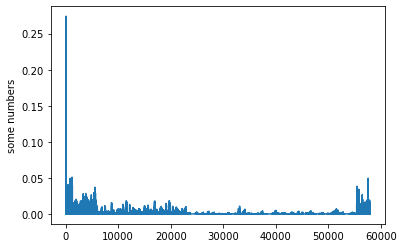

In [98]:
# d = fisher_information[0].flatten()
# index = np.arange(len(d))
# plt.bar(index, d)
# plt.ylabel('some numbers')
# plt.show()

d = [x.flatten() for x in fisher_information]
d = np.concatenate(d)

# d = a[0].flatten()
# index = np.arange(len(d))
# plt.bar(index, d)
plt.plot(d)
plt.ylabel('some numbers')
plt.show()

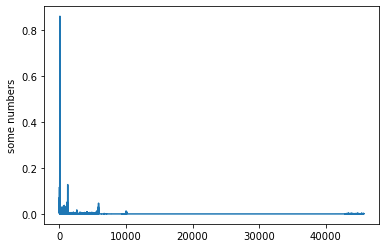

In [8]:
with open('mnist_network_fisher.npy', 'rb') as f:
    a = np.load(f, allow_pickle=True, encoding = 'latin1')

d = [x.flatten() for x in a]
d = np.concatenate(d)

# d = a[0].flatten()
# index = np.arange(len(d))
# plt.bar(index, d)
plt.plot(d)
plt.ylabel('some numbers')
plt.show()